In [20]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

sys.path.insert(0, os.path.join("..", "src"))
sys.path.insert(0, os.path.join("..", "examples"))

from augmentation import TransformData
from data_generators import get_data_from_file
from tools import experiment, run_model_for_raw_and_augmented_data, smape

import warnings

warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
model = RandomForestRegressor(n_estimators=200, random_state=42)

nums = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
]  # lost data from files "07", "08", "09" for test

experiments = []

for num in nums:
    filename = os.path.join("..", "examples", "data", f"df_{num}.csv")
    exp = get_data_from_file(filename)
    experiments.append(exp)

experiments = pd.DataFrame(experiments, columns=["df", "train_test_split"])

N_possible_values = range(8, 20, 2)
K_possible_values = range(8, 20, 2)

res = []
for i, row in experiments.iterrows():
    print
    df, train_test_split = row["df"], row["train_test_split"]
    print(f"processing experiment {i}...")
    pivot_result_table = []
    for n in N_possible_values:
        for k in K_possible_values:
            result_raw_data, result_augmented_data = experiment(
                model=model,
                df=df,
                train_test_split=train_test_split,
                N=n,
                K=k,
                tabgan=False,
            )

            pivot_result_table.append([i, n, k, result_raw_data, result_augmented_data])

    pivot_result_table = pd.DataFrame(
        data=pivot_result_table,
        columns=["experiment", "N", "K", "raw_data_mape", "augmented_data_mape"],
    )

    pivot_result_table[["raw_data_mape", "augmented_data_mape"]] /= pivot_result_table[
        ["raw_data_mape", "augmented_data_mape"]
    ].mean()

    pivot_result_table = pivot_result_table.sort_values("augmented_data_mape")
    pivot_result_table["exp rang"] = range(len(pivot_result_table))
    res.append(pivot_result_table)

res = pd.concat(res)
print("done")

processing experiment 0...
processing experiment 1...
processing experiment 2...
processing experiment 3...
processing experiment 4...
processing experiment 5...
done


In [22]:
res["n"] = res["N"].astype(int).copy()
res["k"] = res["K"].astype(int).copy()
res = res.groupby(["N", "K"]).mean()
res

experiment  raw_data_mape  augmented_data_mape   exp rang     n     k
N  K                                                                        
8  8          2.5            1.0             1.006656  15.333333   8.0   8.0
   10         2.5            1.0             1.078243  18.333333   8.0  10.0
   12         2.5            1.0             1.063430  13.166667   8.0  12.0
   14         2.5            1.0             1.041993  16.000000   8.0  14.0
   16         2.5            1.0             1.010800  13.666667   8.0  16.0
   18         2.5            1.0             1.009473  13.500000   8.0  18.0
10 8          2.5            1.0             0.991869  18.166667  10.0   8.0
   10         2.5            1.0             1.037068  20.166667  10.0  10.0
   12         2.5            1.0             1.031137  20.166667  10.0  12.0
   14         2.5            1.0             1.046202  23.000000  10.0  14.0
   16         2.5            1.0             1.034550  23.333333  10.0  16.0
   18         2.5            1.0             1.028065  21.500000  10.0  18.0
12 8          2.5            1.0             0.964598  15.500000  12.0   8.0
   10         2.5            1.0             1.032021  20.666667  12.0  10.0
   12         2.5            1.0             1.018582  16.000000  12.0  12.0
   14         2.5            1.0             1.050753  20.166667  12.0  14.0
   16         2.5            1.0             1.004751  16.833333  12.0  16.0
   18         2.5            1.0             0.999888  15.000000  12.0  18.0
14 8          2.5            1.0             0.938265  13.333333  14.0   8.0
   10         2.5            1.0             1.025517  23.333333  14.0  10.0
   12         2.5            1.0             1.011384  17.666667  14.0  12.0
   14         2.5            1.0             1.001484  17.000000  14.0  14.0
   16         2.5            1.0             0.959093  18.000000  14.0  16.0
   18         2.5            1.0             0.957933  16.166667  14.0  18.0
16 8          2.5            1.0             0.938393  13.666667  16.0   8.0
   10         2.5            1.0             1.027231  20.833333  16.0  10.0
   12         2.5            1.0             1.021331  17.833333  16.0  12.0
   14         2.5            1.0             1.039807  21.333333  16.0  14.0
   16         2.5            1.0             0.975262  17.500000  16.0  16.0
   18         2.5            1.0             0.977822  18.333333  16.0  18.0
18 8          2.5            1.0             0.885562  10.666667  18.0   8.0
   10         2.5            1.0             0.982119  18.666667  18.0  10.0
   12         2.5            1.0             0.968481  15.166667  18.0  12.0
   14         2.5            1.0             0.991519  18.666667  18.0  14.0
   16         2.5            1.0             0.925426  15.333333  18.0  16.0
   18         2.5            1.0             0.923294  16.000000  18.0  18.0

<AxesSubplot:xlabel='k', ylabel='n'>

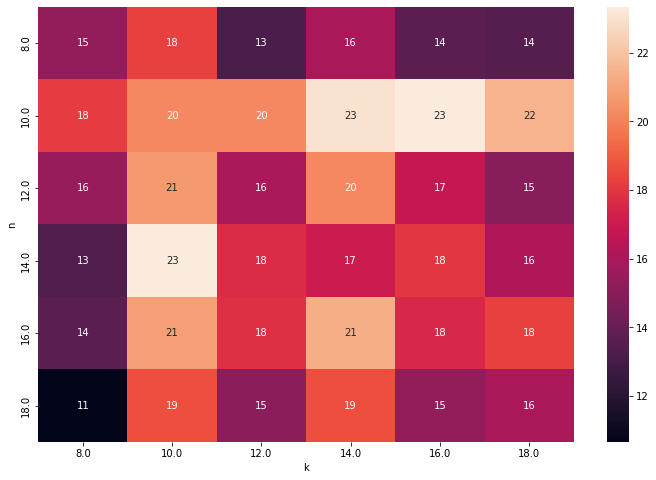

In [23]:
piv = res.pivot(index="n", columns="k", values="exp rang")
plt.figure(figsize=(12, 8))
sns.heatmap(piv, annot=True)

In [24]:
# вибираем
N_best = 18
K_best = 8

In [25]:
experiments = []
for num in ["07", "08", "09"]:
    filename = os.path.join("..", "examples", "data", f"df_{num}.csv")
    exp = get_data_from_file(filename)
    exp[0]["num"] = num
    experiments.append(exp)

experiments = pd.DataFrame(experiments, columns=["df", "train_test_split"])

In [26]:
experiments

,df,train_test_split
0,time y a b ...,2017-08-28 13:30:00
1,time y a b ...,2017-11-19 13:30:00
2,time y a b ...,2017-11-18 13:30:00


In [27]:
res = []
rr = []
for i, row in experiments.iterrows():
    print(f"experiment {i} is processing...")
    df, train_test_split = row["df"], row["train_test_split"]

    e = run_model_for_raw_and_augmented_data(
        model, df, train_test_split, N=N_best, K=K_best, tabgan=False
    )

    e = e[~np.isnan(e.y)]
    e["exp"] = i
    rr.append(e)
    result_raw_data = smape(e.y, e.pred_raw)
    result_augmented_data = smape(e.y, e.pred_augm)

    res.append([N_best, K_best, result_raw_data, result_augmented_data])

res = pd.DataFrame(
    data=res,
    columns=["N", "K", "raw_data_mape", "augmented_data_mape"],
)
rr = pd.concat(rr)
res
print("done")

experiment 0 is processing...
experiment 1 is processing...
experiment 2 is processing...
done


In [28]:
res

,N,K,raw_data_mape,augmented_data_mape
0,18,8,0.079431,0.066225
1,18,8,0.034461,0.034361
2,18,8,0.061409,0.042116


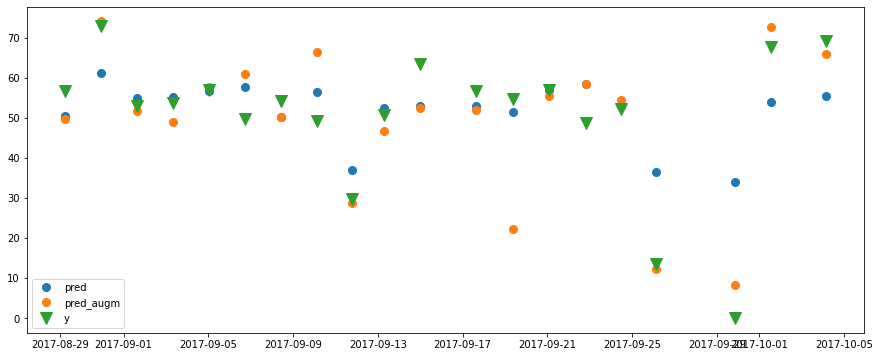

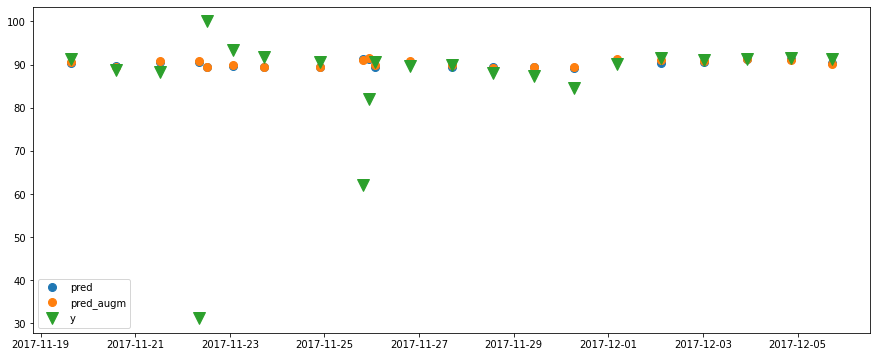

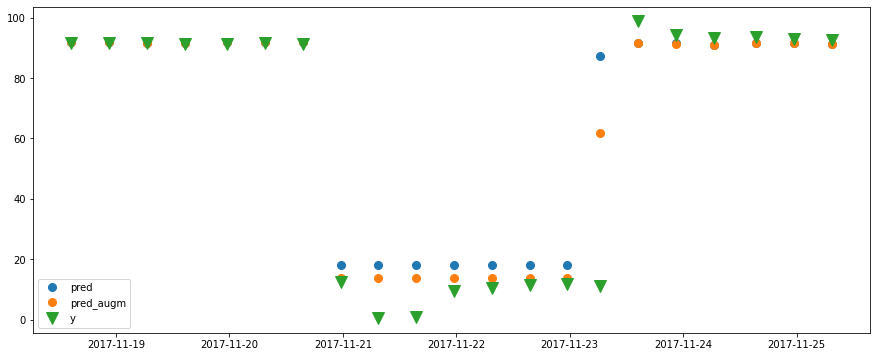

In [29]:
for i in rr.exp.unique():
    d = rr[rr.exp == i]
    plt.figure(figsize=(15, 6))
    plt.plot(d.time, d.pred_raw, "o", markersize=8, label="pred")
    plt.plot(d.time, d.pred_augm, "o", markersize=8, label="pred_augm")
    plt.plot(d.time, d.y, "v", markersize=12, label="y")
    plt.legend()
    plt.show()

## Let's search the hyperparameters for Tabgan

In [ ]:
model = RandomForestRegressor(n_estimators=200)

nums = ["01", "02", "03", "04", "05", "06", "07", "08", "09"]

experiments = []

for num in nums:
    filename = os.path.join("..", "examples", "data", f"df_{num}.csv")
    exp = get_data_from_file(filename)
    experiments.append(exp)

experiments = pd.DataFrame(experiments, columns=["df", "train_test_split"])

N_possible_values = range(6, 30, 2)
K_possible_values = range(6, 22, 2)

res = []
for i, row in experiments.iterrows():
    df, train_test_split = row["df"], row["train_test_split"]
    print(f"processing experiment {i}...")
    pivot_result_table = []
    for n in N_possible_values:
        for k in K_possible_values:
            result_raw_data, result_augmented_data = experiment(
                model=model,
                df=df,
                train_test_split=train_test_split,
                N=n,
                K=k,
                augm=False,
                tabgan=True,
            )

            pivot_result_table.append([i, n, k, result_raw_data, result_augmented_data])

    pivot_result_table = pd.DataFrame(
        data=pivot_result_table,
        columns=["experiment", "N", "K", "raw_data_mape", "augmented_data_mape"],
    )

    pivot_result_table[["raw_data_mape", "augmented_data_mape"]] /= pivot_result_table[
        ["raw_data_mape", "augmented_data_mape"]
    ].mean()

    pivot_result_table = pivot_result_table.sort_values("augmented_data_mape")
    pivot_result_table["exp rang"] = range(len(pivot_result_table))
    res.append(pivot_result_table)

res = pd.concat(res)
print("done")

processing experiment 0...


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]